### Import Statements, Setting Up Dataframe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd /content/drive/My\ Drive/CS\ 4641

Mounted at /content/drive/
/content/drive/My Drive/CS 4641


In [ ]:
df = pd.read_csv('diabetes_cleaned_replaced.csv')
df = df.loc[:, df.columns != '0']
df = df.loc[:, df.columns != '1']
df = df.loc[:, df.columns != 'Unnamed: 0']
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,10.0,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276.00,250.01,255.000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,30.0,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8.00,250.43,403.000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,40.0,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197.00,157.00,250.000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,50.0,2.0,1.0,2.0,3.0,31.0,6.0,16.0,0.0,0.0,0.0,414.00,411.00,250.000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,70.0,1.0,1.0,7.0,5.0,73.0,0.0,12.0,0.0,0.0,0.0,428.00,492.00,250.000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.0,1.0,50.0,1.0,3.0,7.0,5.0,39.0,2.0,28.0,0.0,0.0,0.0,823.00,891.00,489.876,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101762,1.7,1.0,50.0,1.0,6.0,7.0,13.0,74.0,6.0,64.0,0.0,0.0,0.0,414.00,357.00,250.600,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101763,0.0,1.0,10.0,1.0,7.0,7.0,1.0,59.0,6.0,9.0,0.0,0.0,1.0,250.13,477.60,477.600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101764,0.4,0.0,70.0,2.0,1.0,1.0,4.0,41.0,0.0,13.0,0.0,0.0,0.0,491.00,250.00,272.000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


# Decision Tree for Predicting Insulin Level
Summary: Achieved almost identical accuracy of 75% which was similar to logistic regression with default tree. Graph of feature importances is included. I also tried making decision trees based on entropy vs the default gini index but observed no significant differences.
Max leaf nodes with no limits was around 11,000 with an accuracy of around 75%. With optimization of number of leaf nodes to around 100, the accuracy increased to 80%.

Accuracy for tree 0:  0.7527267367593593
Depth:  45
Number of leaves:  11335
Accuracy for tree 1:  0.7570502112606858
Depth:  53
Number of leaves:  11274
Accuracy for tree 2:  0.7535128230323278
Depth:  56
Number of leaves:  11402
Accuracy for tree 3:  0.7541515181291146
Depth:  49
Number of leaves:  11354
Accuracy for tree 4:  0.7485015230421539
Depth:  46
Number of leaves:  11376


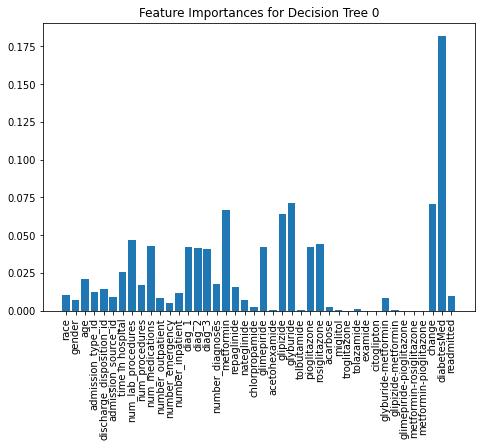

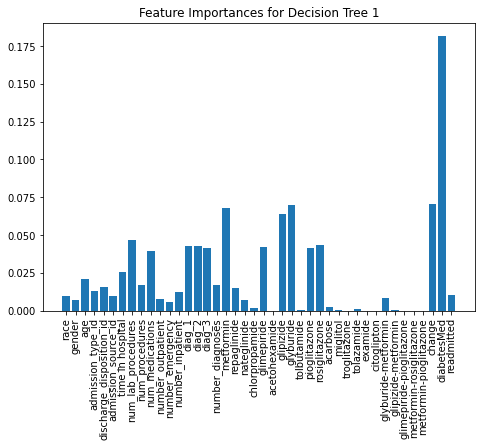

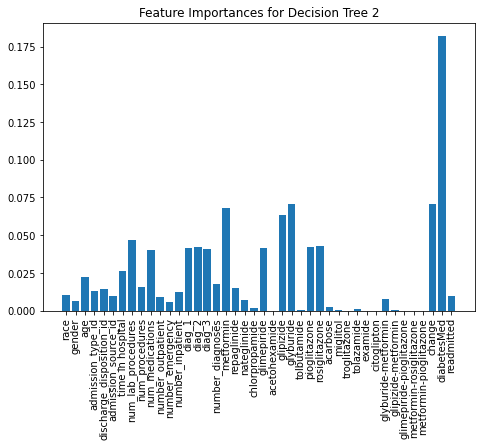

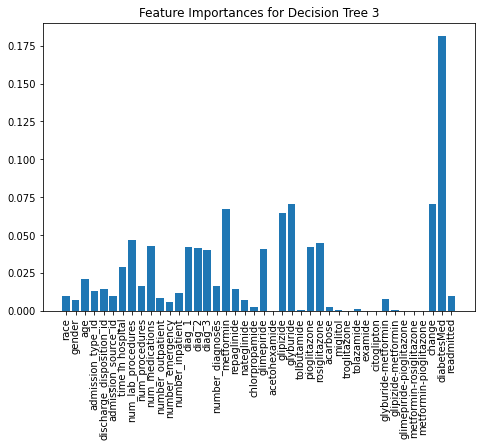

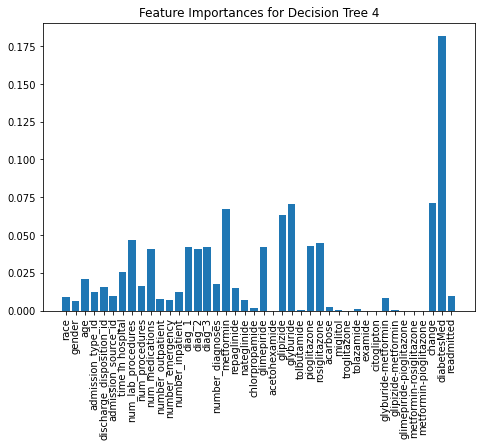

In [ ]:
insulin_X = df.loc[:, df.columns != '36']
insulin_Y = df[['36']]
labels = np.array(['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id', 'time in hospital',	
          'num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',	
          'diag_1','diag_2','diag_3','number_diagnoses','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
          'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
          'tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin',	'glimepiride-pioglitazone',	
          'metformin-rosiglitazone', 'metformin-pioglitazone','change','diabetesMed','readmitted'])

for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(insulin_X, insulin_Y, test_size =0.2)
#tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
#fit(tree, x_train, y_train, sample_weight=None, check_input=True, X_idx_sorted='deprecated')
    decisionTree = tree.DecisionTreeClassifier()
    decisionTree.fit(x_train, y_train)
    y_pred = decisionTree.predict(x_test)
    importanceVals = decisionTree.feature_importances_
    sortedImportanceValues = (np.argsort(-importanceVals))[:]
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(labels, importanceVals)
    plt.title("Feature Importances for Decision Tree " + str(i))
    plt.xticks(rotation = 90)
  #print("Vals: ", vals)
    print("Accuracy for tree " + str(i) + ": ", metrics.accuracy_score(y_test, y_pred))
    depth = decisionTree.get_depth()     
    n_leaves = decisionTree.get_n_leaves()
    print("Depth: ", depth) 
    print("Number of leaves: ", n_leaves)    


Depth:  15
Number of leaves:  75
Accuracy for tree 0:  0.783826274933674
Depth:  15
Number of leaves:  76
Accuracy for tree 1:  0.7854475778716714
Depth:  16
Number of leaves:  77
Accuracy for tree 2:  0.7900167043333006
Depth:  16
Number of leaves:  78
Accuracy for tree 3:  0.7888867053159084
Depth:  15
Number of leaves:  79
Accuracy for tree 4:  0.7916871376633585
Depth:  16
Number of leaves:  80
Accuracy for tree 5:  0.785496708263732
Depth:  16
Number of leaves:  81
Accuracy for tree 6:  0.7873145327699715
Depth:  16
Number of leaves:  82
Accuracy for tree 7:  0.7889849661000294
Depth:  15
Number of leaves:  83
Accuracy for tree 8:  0.7920801807998428
Depth:  16
Number of leaves:  84
Accuracy for tree 9:  0.7875110543382137
Depth:  16
Number of leaves:  85
Accuracy for tree 10:  0.7851527955193083
Depth:  15
Number of leaves:  86
Accuracy for tree 11:  0.7917362680554191
Depth:  16
Number of leaves:  87
Accuracy for tree 12:  0.7865775768890636
Depth:  15
Number of leaves:  88
Accu

Text(0.5, 1.0, 'Accuracy vs Max Number of Leaf Nodes For Predicting Insulin Level')

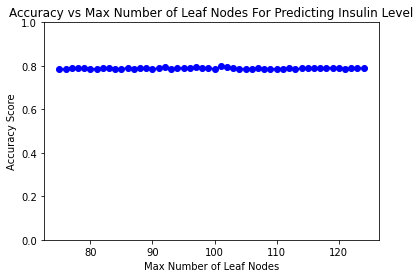

In [ ]:
insulin_X = df.loc[:, df.columns != '36']
insulin_Y = df[['36']]
labels = np.array(['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id', 'time in hospital',	
          'num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',	
          'diag_1','diag_2','diag_3','number_diagnoses','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
          'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
          'tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin',	'glimepiride-pioglitazone',	
          'metformin-rosiglitazone', 'metformin-pioglitazone','change','diabetesMed','readmitted'])
leaf_nodes = [10, 25, 50, 75, 100, 200, 300, 400, 500, 1000, 2000, 4000, 8000, 12000, 16000, 20000, 24000, 28000]
accuracyArray = []
list2 = list(range(75, 125))
for i in range(0, len(list2)):
    x_train, x_test, y_train, y_test = train_test_split(insulin_X, insulin_Y, test_size =0.2)
    decisionTree = tree.DecisionTreeClassifier(max_leaf_nodes=list2[i])
    decisionTree.fit(x_train, y_train)
    y_pred = decisionTree.predict(x_test)
    depth = decisionTree.get_depth()     
    n_leaves = decisionTree.get_n_leaves()
    print("Depth: ", depth) 
    print("Number of leaves: ", n_leaves) 
    print("Accuracy for tree " + str(i) + ": ", metrics.accuracy_score(y_test, y_pred))
    accuracyArray.append(metrics.accuracy_score(y_test, y_pred))

print("Max accuracy: ", max(accuracyArray))
plt.plot(list2, accuracyArray,'bo-')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('Max Number of Leaf Nodes')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Max Number of Leaf Nodes For Predicting Insulin Level')
  



# Decision Tree for Predicting Readmitted Liklihood
Summary: Accuracy of ~48% with all features and no limitation on tree size. Found that removing the last 25 features only decreased accuracy by less than 1%. Decreasing the max number of leaves increases accuracy, indicating decision tree is overfitting too much by default. Increased accuracy to 58.3% by limiting leaf nodes around 27 nodes when default amount produced was around 24,000

Accuracy for tree 0:  0.4746487176967672
Depth:  45
Number of leaves:  24411
Accuracy for tree 1:  0.47248698044610393
Depth:  46
Number of leaves:  24500
Accuracy for tree 2:  0.4780878451410042
Depth:  46
Number of leaves:  24309
Accuracy for tree 3:  0.4701287216271986
Depth:  44
Number of leaves:  24524
Accuracy for tree 4:  0.47327306671907243
Depth:  48
Number of leaves:  24490


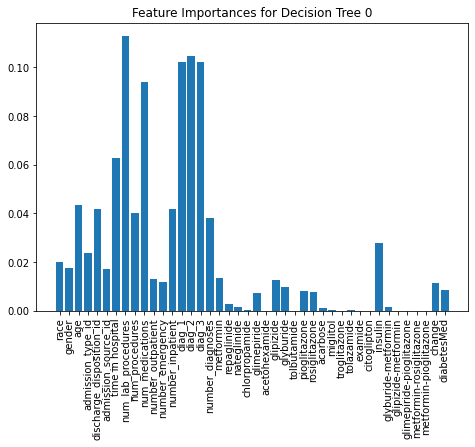

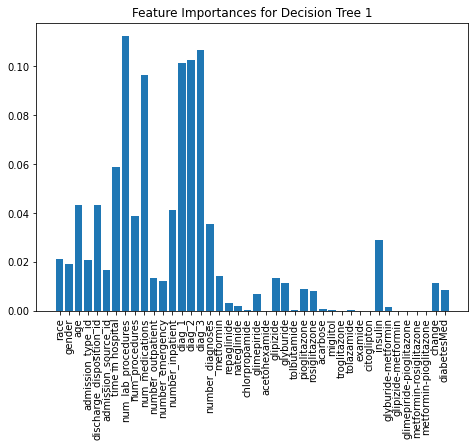

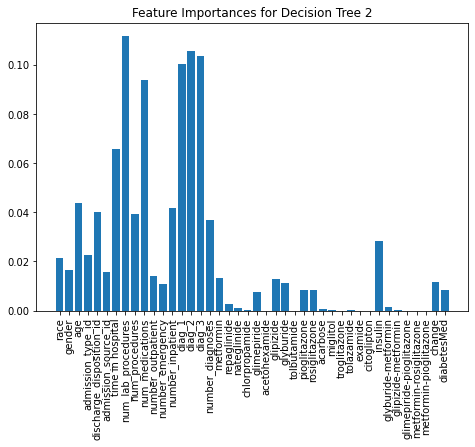

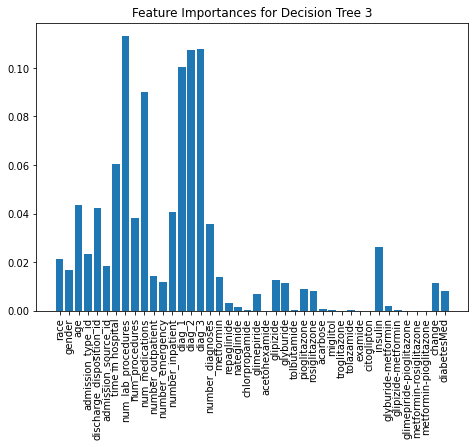

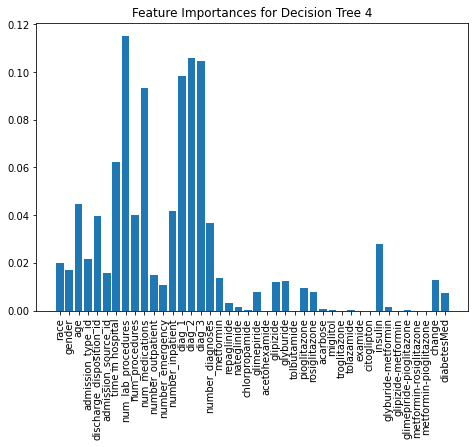

In [ ]:
readmitted_X = df.loc[:, df.columns != '44']
readmitted_Y = df[['44']]
labels = np.array(['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id', 'time in hospital',	
          'num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',	
          'diag_1','diag_2','diag_3','number_diagnoses','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
          'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
          'tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',	'glimepiride-pioglitazone',	
          'metformin-rosiglitazone', 'metformin-pioglitazone','change','diabetesMed'])

for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(readmitted_X, readmitted_Y, test_size =0.2)
  #tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
  #fit(tree, x_train, y_train, sample_weight=None, check_input=True, X_idx_sorted='deprecated')
    decisionTree = tree.DecisionTreeClassifier()
    decisionTree.fit(x_train, y_train)
    y_pred = decisionTree.predict(x_test)
    importanceVals = decisionTree.feature_importances_
    sortedImportanceValues = (np.argsort(-importanceVals))[:]
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(labels, importanceVals)
    plt.title("Feature Importances for Decision Tree " + str(i))
    plt.xticks(rotation = 90)
    #print("Vals: ", vals)
    print("Accuracy for tree " + str(i) + ": ", metrics.accuracy_score(y_test, y_pred))
    depth = decisionTree.get_depth()     
    n_leaves = decisionTree.get_n_leaves()
    print("Depth: ", depth) 
    print("Number of leaves: ", n_leaves)
                              

Accuracy for tree 0:  0.4707182863319249
Depth:  44
Number of leaves:  25356
Accuracy for tree 1:  0.47233958926992237
Depth:  44
Number of leaves:  25356
Accuracy for tree 2:  0.4636435098752088
Depth:  43
Number of leaves:  25386
Accuracy for tree 3:  0.4732239363270119
Depth:  46
Number of leaves:  25332
Accuracy for tree 4:  0.47229045887786186
Depth:  43
Number of leaves:  25311


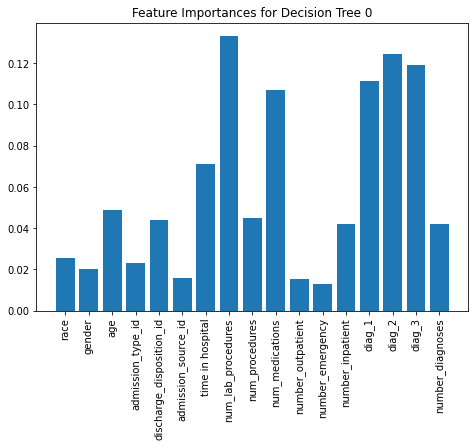

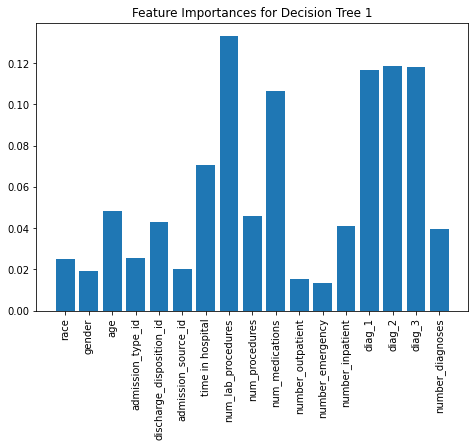

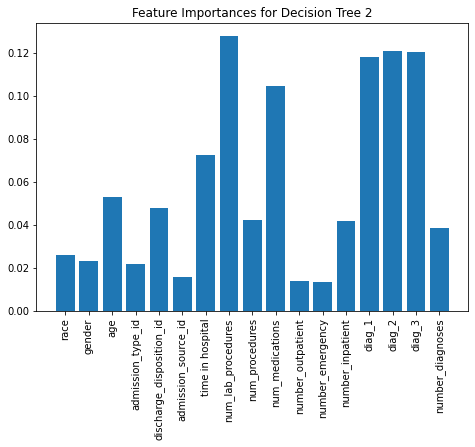

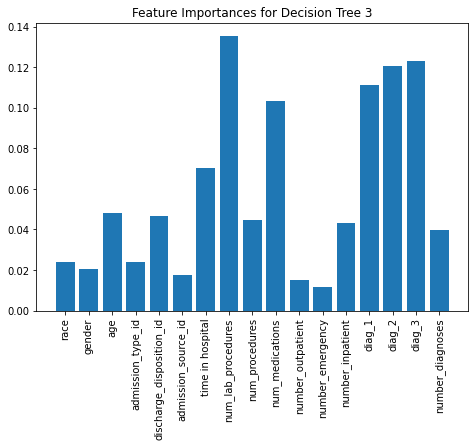

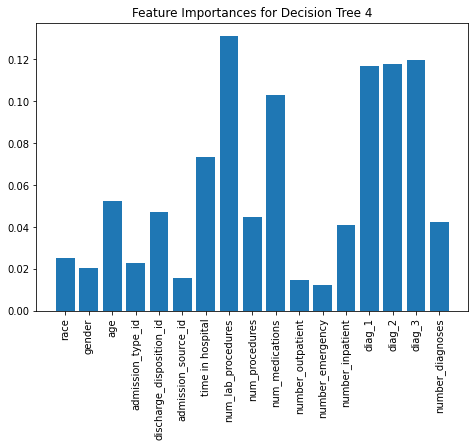

In [ ]:
#Code to remove last 25 features and predict from that data
readmitted_X = df.loc[:, df.columns != '44']
readmitted_Y = df[['44']]
readmitted_X = readmitted_X.iloc[:, :17]
#readmitted_X = readmitted_X.loc[:, readmitted_X.columns != '14']
#readmitted_X = readmitted_X.loc[:, readmitted_X.columns != '13']

readmitted_Y = df[['44']]
labels = np.array(['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id', 'time in hospital',	
          'num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',	
          'diag_1','diag_2','diag_3','number_diagnoses'])

for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(readmitted_X, readmitted_Y, test_size =0.2)
    decisionTree = tree.DecisionTreeClassifier()
    decisionTree.fit(x_train, y_train)
    y_pred = decisionTree.predict(x_test)
    importanceVals = decisionTree.feature_importances_
    #sortedImportanceValues = (np.argsort(-importanceVals))[:]
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(labels, importanceVals)
    plt.title("Feature Importances for Decision Tree " + str(i))
    plt.xticks(rotation = 90)
  #print("Vals: ", vals)
    print("Accuracy for tree " + str(i) + ": ", metrics.accuracy_score(y_test, y_pred))
    depth = decisionTree.get_depth()     
    n_leaves = decisionTree.get_n_leaves()
    print("Depth: ", depth) 
    print("Number of leaves: ", n_leaves)

Depth:  3
Number of leaves:  5
Accuracy for tree:  0.5652942910484425
Depth:  4
Number of leaves:  6
Accuracy for tree:  0.5705512429989191
Depth:  4
Number of leaves:  7
Accuracy for tree:  0.5705512429989191
Depth:  4
Number of leaves:  8
Accuracy for tree:  0.5704529822147981
Depth:  4
Number of leaves:  9
Accuracy for tree:  0.5654416822246241
Depth:  4
Number of leaves:  10
Accuracy for tree:  0.566080377321411
Depth:  4
Number of leaves:  11
Accuracy for tree:  0.5683403753561953
Depth:  5
Number of leaves:  12
Accuracy for tree:  0.5644590743834136
Depth:  5
Number of leaves:  13
Accuracy for tree:  0.5639186400707478
Depth:  5
Number of leaves:  14
Accuracy for tree:  0.5768890635747274
Depth:  6
Number of leaves:  15
Accuracy for tree:  0.574530804755822
Depth:  6
Number of leaves:  16
Accuracy for tree:  0.5756608037732142
Depth:  6
Number of leaves:  17
Accuracy for tree:  0.5746781959320035
Depth:  6
Number of leaves:  18
Accuracy for tree:  0.5812616684681143
Depth:  6
Num

Text(0.5, 1.0, 'Accuracy vs Max Number of Leaf Nodes For Predicting Readmitted Likelihood')

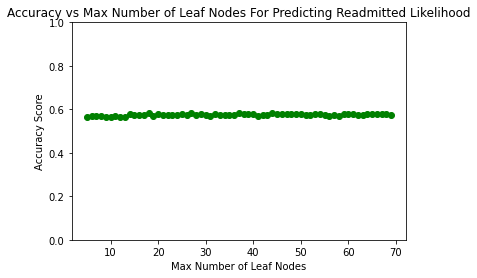

In [ ]:
readmitted_X = df.loc[:, df.columns != '44']
readmitted_Y = df[['44']]
readmitted_X = readmitted_X.iloc[:, :17]
#readmitted_X = readmitted_X.loc[:, readmitted_X.columns != '14']
#readmitted_X = readmitted_X.loc[:, readmitted_X.columns != '13']

readmitted_Y = df[['44']]
labels = np.array(['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id', 'time in hospital',	
          'num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',	
          'diag_1','diag_2','diag_3','number_diagnoses'])
leaf_nodes = [10, 25, 50, 75, 100, 200, 300, 400, 500, 1000, 2000, 4000, 8000, 12000, 16000, 20000, 24000, 28000]
accuracyArray = []
list2 = list(range(5, 70))
for j in range(0, len(list2)):  
  x_train, x_test, y_train, y_test = train_test_split(readmitted_X, readmitted_Y, test_size =0.2)
  decisionTree = tree.DecisionTreeClassifier(max_leaf_nodes=list2[j])
  decisionTree.fit(x_train, y_train)
  y_pred = decisionTree.predict(x_test)
  importanceVals = decisionTree.feature_importances_
  depth = decisionTree.get_depth()     
  n_leaves = decisionTree.get_n_leaves()
  accuracyArray.append(metrics.accuracy_score(y_test, y_pred))
  print("Depth: ", depth) 
  print("Number of leaves: ", n_leaves)
  print("Accuracy for tree: ", metrics.accuracy_score(y_test, y_pred))


print("Max accuracy: ", max(accuracyArray))
plt.plot(list2, accuracyArray,'go-')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('Max Number of Leaf Nodes')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Max Number of Leaf Nodes For Predicting Readmitted Likelihood')